# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize period, smas, pct_stop_loss, or margin)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [11]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [12]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define Optimizations

In [13]:
# pick one
optimize_period = False
optimize_smas = True
optimize_pct = False
optimize_margin = False

# define high low trade periods ranges
if optimize_period:
    Xs = range(2, 15, 1)
    Xs = [str(X) for X in Xs]

# define SMAs ranges
elif optimize_smas:
    Xs = range(20, 200, 10)
    Xs = [str(X) for X in Xs]

# define stop loss percentage ranges
elif optimize_pct:
    Xs = range(70, 96, 1)
    Xs = [str(X) for X in Xs]

# define margin ranges
elif optimize_margin:
    Xs = range(10, 41, 2)
    Xs = [str(X) for X in Xs]

Run Strategy

In [14]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_period:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, period=int(X), use_regime_filter=True)
    elif optimize_smas:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, sma=int(X))
    elif optimize_pct:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, stop_loss_pct=int(X), use_regime_filter=True)
    elif optimize_margin:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, margin=int(X)/10, use_regime_filter=True)
    strategies[X].run()
    strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 

Summarize results

In [15]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'expected_shortfall',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190
annual_return_rate,8.53,9.03,8.89,8.57,9.09,8.88,8.99,8.18,8.04,8.12,7.99,8.02,7.89,7.73,7.77,7.95,7.83,7.83
max_closed_out_drawdown,-25.53,-20.31,-23.66,-22.69,-15.31,-15.30,-15.31,-15.31,-15.54,-19.79,-18.74,-18.75,-19.26,-19.28,-18.50,-15.31,-15.31,-15.31
drawdown_annualized_return,-2.99,-2.25,-2.66,-2.65,-1.68,-1.72,-1.70,-1.87,-1.93,-2.44,-2.35,-2.34,-2.44,-2.49,-2.38,-1.93,-1.95,-1.95
drawdown_recovery,-2.27,-0.55,-2.27,-2.27,-0.25,-0.25,-0.25,-0.25,-2.61,-2.61,-2.61,-2.61,-2.61,-2.61,-2.61,-0.25,-0.25,-0.25
expected_shortfall,-8.16,-8.16,-8.16,-8.16,-6.81,-6.81,-6.81,-7.12,-7.12,-6.81,-7.13,-7.13,-7.13,-7.13,-7.13,-7.13,-7.13,-7.13
best_month,12.90,12.88,12.88,12.88,12.88,12.88,12.88,12.87,12.89,12.89,12.89,12.89,12.89,12.89,12.89,12.89,12.89,12.89
worst_month,-13.89,-13.88,-13.88,-13.90,-13.53,-13.53,-13.53,-13.54,-13.53,-13.54,-13.52,-13.52,-13.53,-13.55,-13.52,-13.54,-13.54,-13.54
sharpe_ratio,0.82,0.85,0.84,0.81,0.87,0.87,0.88,0.81,0.80,0.81,0.80,0.81,0.80,0.79,0.79,0.82,0.81,0.81
sortino_ratio,0.64,0.67,0.66,0.64,0.68,0.68,0.68,0.63,0.62,0.62,0.61,0.61,0.60,0.59,0.59,0.60,0.59,0.59
monthly_std,2.32,2.37,2.34,2.33,2.26,2.22,2.22,2.24,2.22,2.17,2.16,2.16,2.16,2.15,2.15,2.11,2.11,2.11


Bar graphs

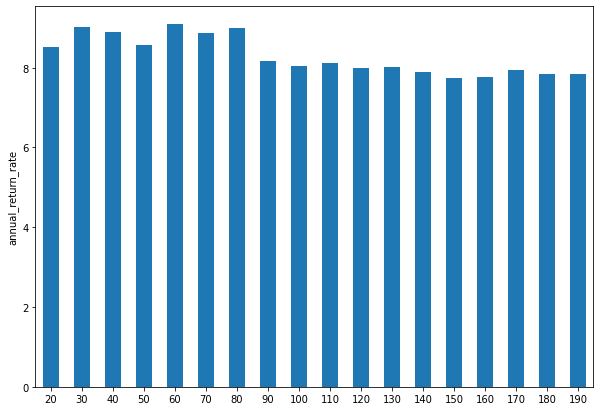

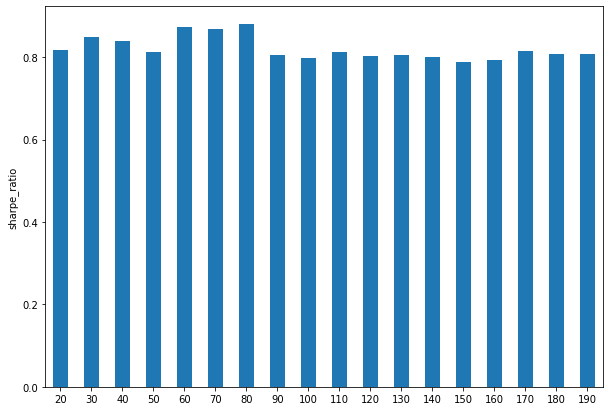

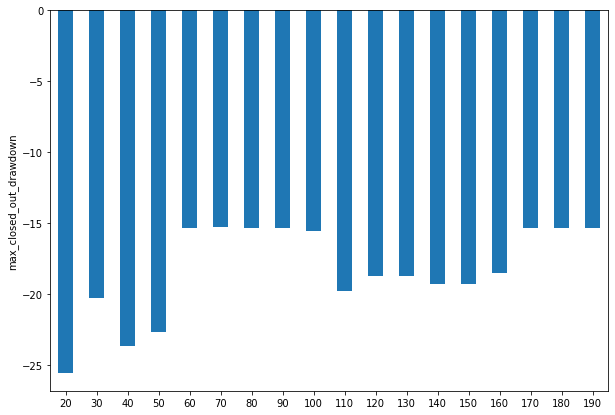

In [16]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [17]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-12-22 00:00:00 SELL 215 SPY @ 367.85


Equity curve

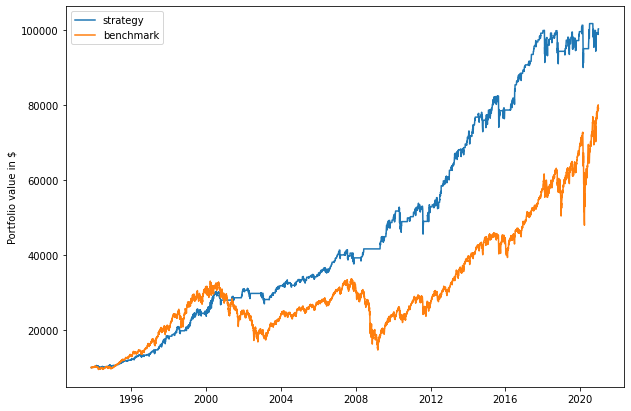

In [18]:
if   optimize_period: Y = '7'
elif optimize_smas:   Y = '70'
elif optimize_pct:    Y = '85'
elif optimize_margin: Y = '10'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)